# Exploratory Data Analysis Project

## Overview of the dataset and its variables

The underlying dataset describes the house market in King County/ WA. This dataset will be used for both providing advice to house buyers and sellers as well as for prediction purposes. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline
pd.options.display.max_columns = None

In [321]:
df_var = pd.DataFrame({'Variables': ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
                    'Description': ['unique identified for a house', 'house was sold', 'is prediction target', 'of Bedrooms/House', 'of bathrooms/bedrooms', 'footage of the home', 'footage of the lot', 'floors (levels) in house', 'House which has a view to a waterfront', 'Has been viewed', 'How good the condition is ( Overall )', 'overall grade given to the housing unit, based on King County grading system', ' square footage of house apart from basement', 'square footage of the basement', 'Built Year', 'Year when house was renovated', 'zip', 'Latitude coordinate', 'Longitude coordinate', 'The square footage of interior housing living space for the nearest 15 neighbors', 'The square footage of the land lots of the nearest 15 neighbors']},
                     index=[i for i in range(21)])
df_var = df_var.style.set_properties(subset=['Description'], **{'width-min': '400px'})
df_var

,Variables,Description
0,id,unique identified for a house
1,date,house was sold
2,price,is prediction target
3,bedrooms,of Bedrooms/House
4,bathrooms,of bathrooms/bedrooms
5,sqft_living,footage of the home
6,sqft_lot,footage of the lot
7,floors,floors (levels) in house
8,waterfront,House which has a view to a waterfront
9,view,Has been viewed


In [4]:
df = pd.read_csv('King_County_House_prices_dataset.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [5]:
df.shape

(21597, 21)

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Only sgft_basement is an object type variable, which should be changed to float or int. Also time related variables might be changed from numeric to datetime. 

## Non-Graphical Analysis

In order to prepare for graphical analysis and correlation calculations:
* variables will be identified as numerical and categorical variables
* datatypes will be changed if necessary
* null values will treated 

### Statistical overview and unique values

In [43]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4.580474e+09,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,285.72,1971.00,68.76,98077.95,47.56,-122.21,1986.62,12758.28
std,2.876736e+09,367368.14,0.93,0.77,918.11,41412.64,0.54,0.08,0.76,0.65,1.17,827.76,439.82,29.38,364.04,53.51,0.14,0.14,685.23,27274.44
min,1.000102e+06,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,550.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [8]:
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

Due to a low number of unique elements, categorical variables might be: 
* waterfront
* view
* condition
* grade
* floors

In [9]:
df.waterfront.unique()

array([nan,  0.,  1.])

Variable 'waterfront' needs to be cleaned from nan values.

### Changing data types

In [412]:
df['date'] = pd.to_datetime(df['date'])


In [ ]:
df['yr_built'] = df['yr_built'].astype(str)
df['yr_built'] = pd.to_datetime(df['yr_built']) # change data type for plotting

### Treating null values

In [328]:
df.isnull().sum()

id                   0
date             21597
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
month_year           0
rooms                0
log_price            0
geometry             0
dtype: int64

missing values in: waterfront, view, yr_renovated


In [13]:
df['sqft_basement'] = pd.to_numeric(df.sqft_basement, errors='coerce').fillna(0)

In [14]:
df['sqft_basement'].value_counts().head()

0.0      13280
600.0      217
500.0      209
700.0      208
800.0      201
Name: sqft_basement, dtype: int64

In [16]:
df['yr_renovated'].value_counts().head()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

In [17]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)


In [18]:
df['yr_renovated'].value_counts().head()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

nan, and 0 indicating missing values

In [19]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [20]:
df['view'] = df['view'].fillna(0)

In [21]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [330]:
df['waterfront'] = df['waterfront'].fillna(0)

### Adding new features to the data set

In [217]:
df['rooms'] = df['bedrooms'] + df['bathrooms']*df['bedrooms']

In [410]:
df['rooms'].head()

0     6.00
1     9.75
2     4.00
3    16.00
4     9.00
Name: rooms, dtype: float64

In [411]:
df.date.value_counts().head()

Series([], Name: date, dtype: int64)

In [ ]:
df['month_year'] = df['date'].dt.to_period('M') # to drop day from date series 
df['month_year'].head()

In [ ]:
df['month_year'] = df['month_year'].astype(str)
df['month_year'] = pd.to_datetime(df['month_year']) # change data type for plotting
df['month_year'].head()

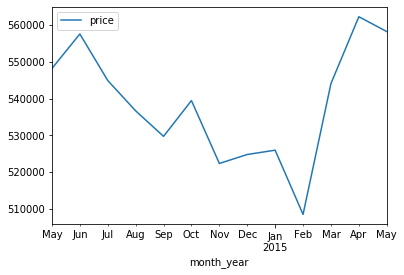

In [422]:
df[['month_year', 'price']].resample('M', on='month_year').mean().plot();

## Graphical Univariate Analysis
* histogram to see if there is skewness and outliers (e.g. .hist() )
* boxplots to get quartiles and outliers, max and min values (e.g. print(train.boxplot(column='disbursed_amount', by='Employment_state)) 
* countplots used for categorical values (e.g. sns.countplot(train.loan_default)
* https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6



### Graphical Analysis of categorical variables

A histogram will be used to learn more about the distribution of following categorical variables: 
* waterfront
* view
* condition
* grade 
* floors
* rooms

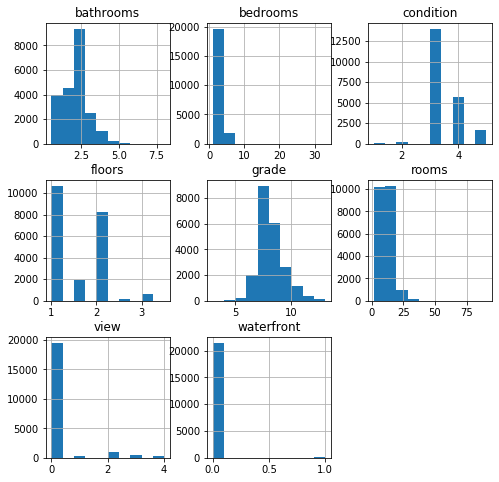

In [408]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df[['waterfront', 'view', 'condition', 'grade', 'floors', 'bedrooms', 'bathrooms', 'rooms']].hist(ax = ax);

Variables seeem to be mainly skewed to the left. 

### Graphical Analysis of numeric variables

All other variables except for time related ones will be plotted against each other. A scatter matrix will help to understand relationships between each pair. 

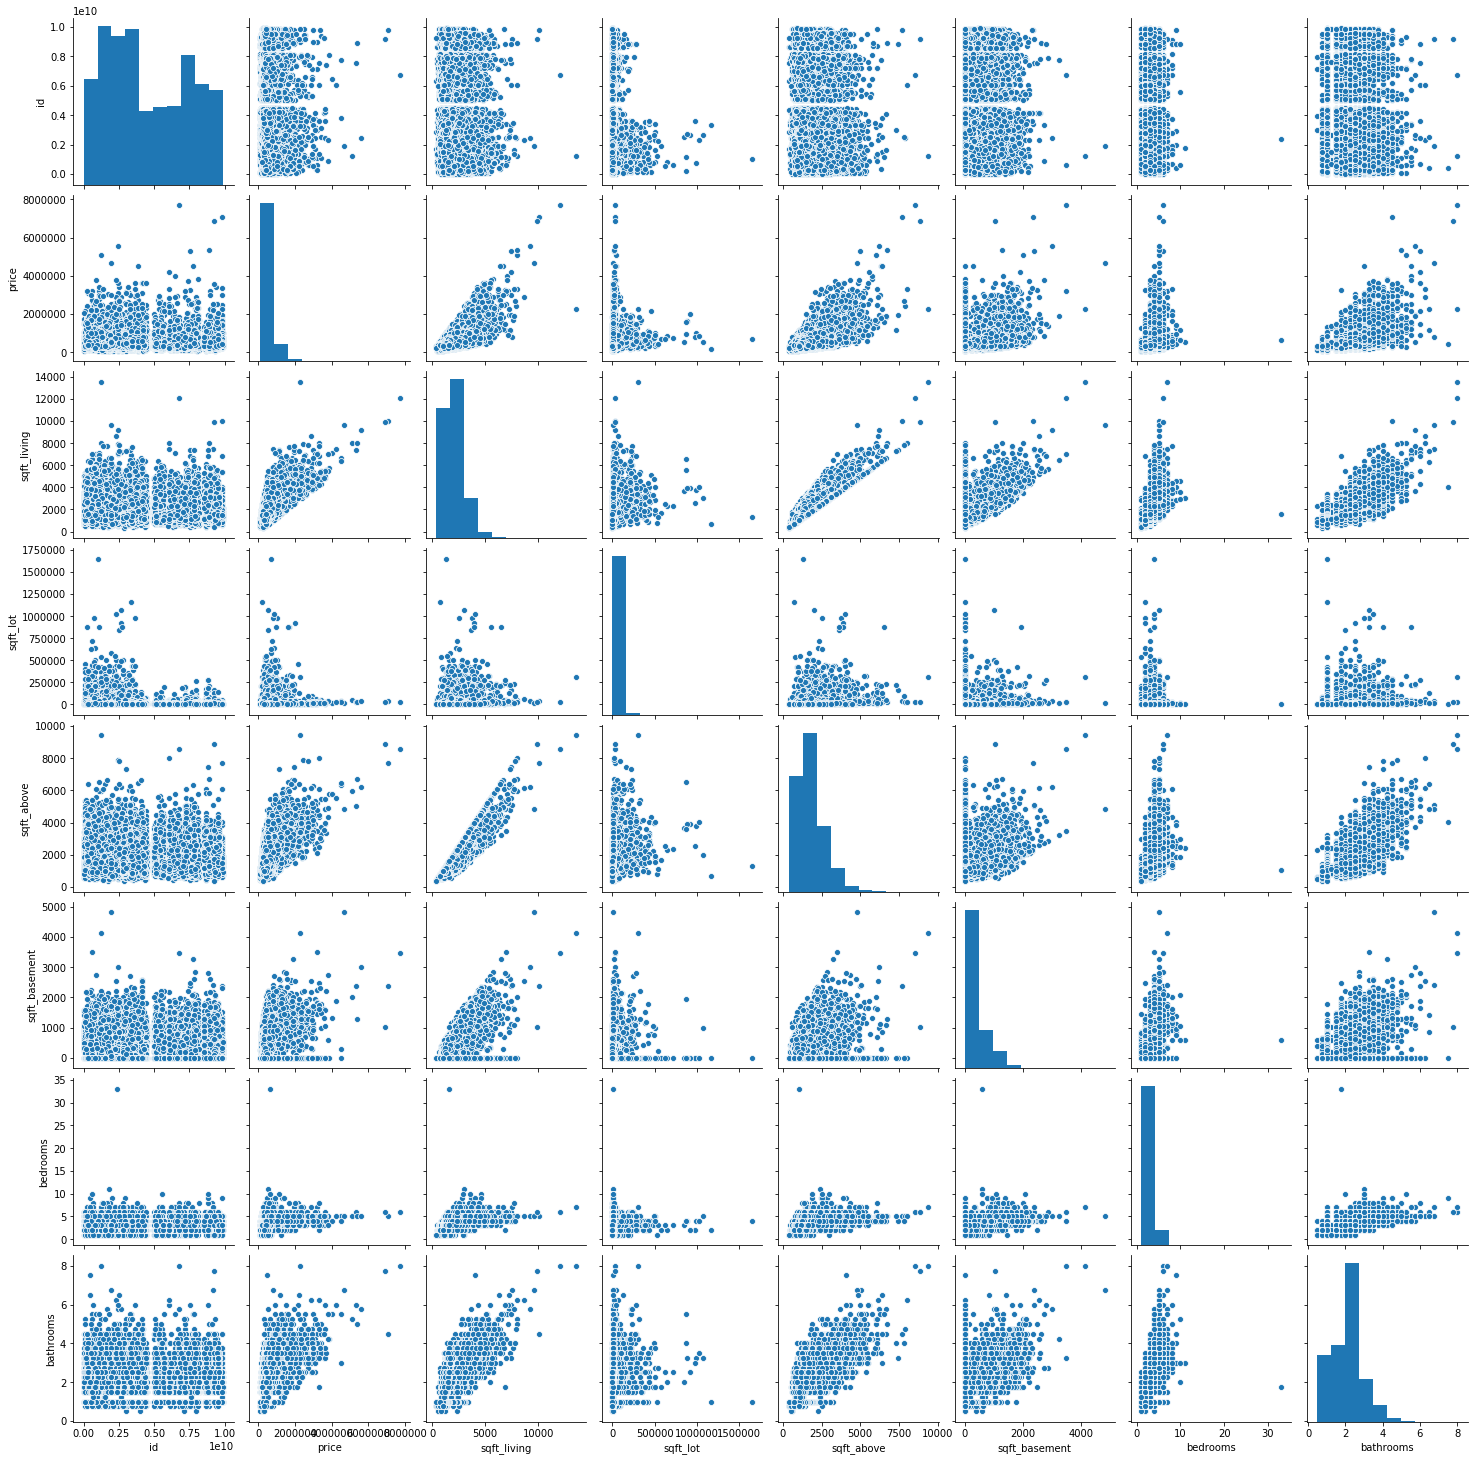

In [409]:
sns.pairplot(df[['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms']]);

### Time Series Analysis

Now time related variables will be analyzed separately to see how they impact house prices or related features. 

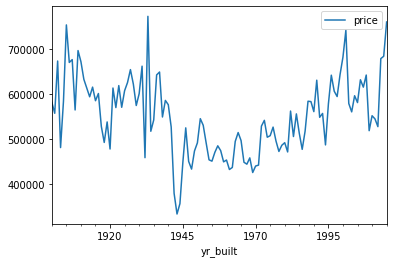

In [420]:
df[['yr_built', 'price']].resample('Y', on='yr_built').mean().plot();

In [433]:
df_renovated = df[['yr_renovated', 'price', 'grade']]

df_renovated['yr_renovated'] = df_renovated[df_renovated.yr_renovated != 0]
df_renovated.describe().round()

,yr_renovated,price,grade
count,744.0,21597.0,21597.0
mean,1996.0,540297.0,8.0
std,16.0,367368.0,1.0
min,1934.0,78000.0,3.0
25%,1987.0,322000.0,7.0
50%,2000.0,450000.0,7.0
75%,2007.0,645000.0,8.0
max,2015.0,7700000.0,13.0


In [ ]:
df_renovated['yr_renovated'] = df_renovated['yr_renovated'].astype(float)
df_renovated['yr_renovated'] = df_renovated['yr_renovated'].astype(int)
df_renovated['yr_renovated'] = df_renovated['yr_renovated'].astype(str)

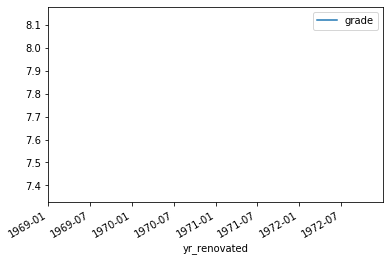

In [434]:
df_renovated['yr_renovated'] = pd.to_datetime(df_renovated['yr_renovated'])

df_renovated[['yr_renovated', 'grade']].resample('Y', on='yr_renovated').mean().plot();

In [440]:
df[['yr_renovated', 'price', 'grade']].query('yr_renovated == 0').describe().round()

,yr_renovated,price,grade
count,20853.0,20853.0,20853.0
mean,0.0,532140.0,8.0
std,0.0,351895.0,1.0
min,0.0,78000.0,3.0
25%,0.0,320000.0,7.0
50%,0.0,449000.0,7.0
75%,0.0,635000.0,8.0
max,0.0,6890000.0,13.0


In [441]:
df.query('yr_renovated == 0').grade.median() # median grade if house has not been renovated

7.0

In [442]:
df_renovated['grade'].median() # median grade after renovation

7.0

Although correlation coefficient indicates no relationship between 'yr_renovated' and 'price' it still has an impact on grade, which is influencing house prices. This might be caused by the fact that the data set had a large amount of missing values for 'yr_renovated', which have been replaced by 0 (0 represents both NaN values and 'not renovated').

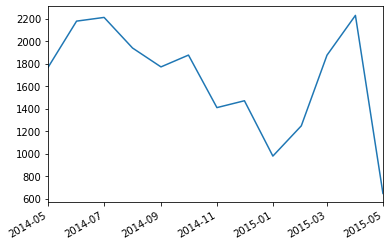

In [416]:
df['month_year'].value_counts().plot();

House sales are not equally distributed across the year. Summer time seems to be preferred for selling and buying houses in King County.

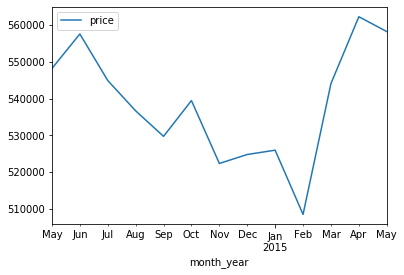

In [423]:
df[['month_year', 'price']].resample('M', on='month_year').mean().plot();

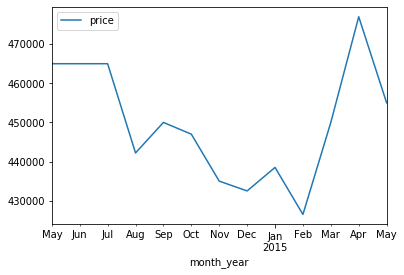

In [424]:
df[['month_year', 'price']].resample('M', on='month_year').median().plot();

In [430]:
df[['month_year', 'price']].max()

month_year    2015-05-01 00:00:00
price                     7.7e+06
dtype: object

## Correlation Analysis

We will use a linear regression model later on for our house price predictions. A heatmap will help to identify those linear relationships. However, above pairplot would also show non-linear relationships, which are not relevant for our linear regression model but still good to know about when providing advice to seller or buyers. 

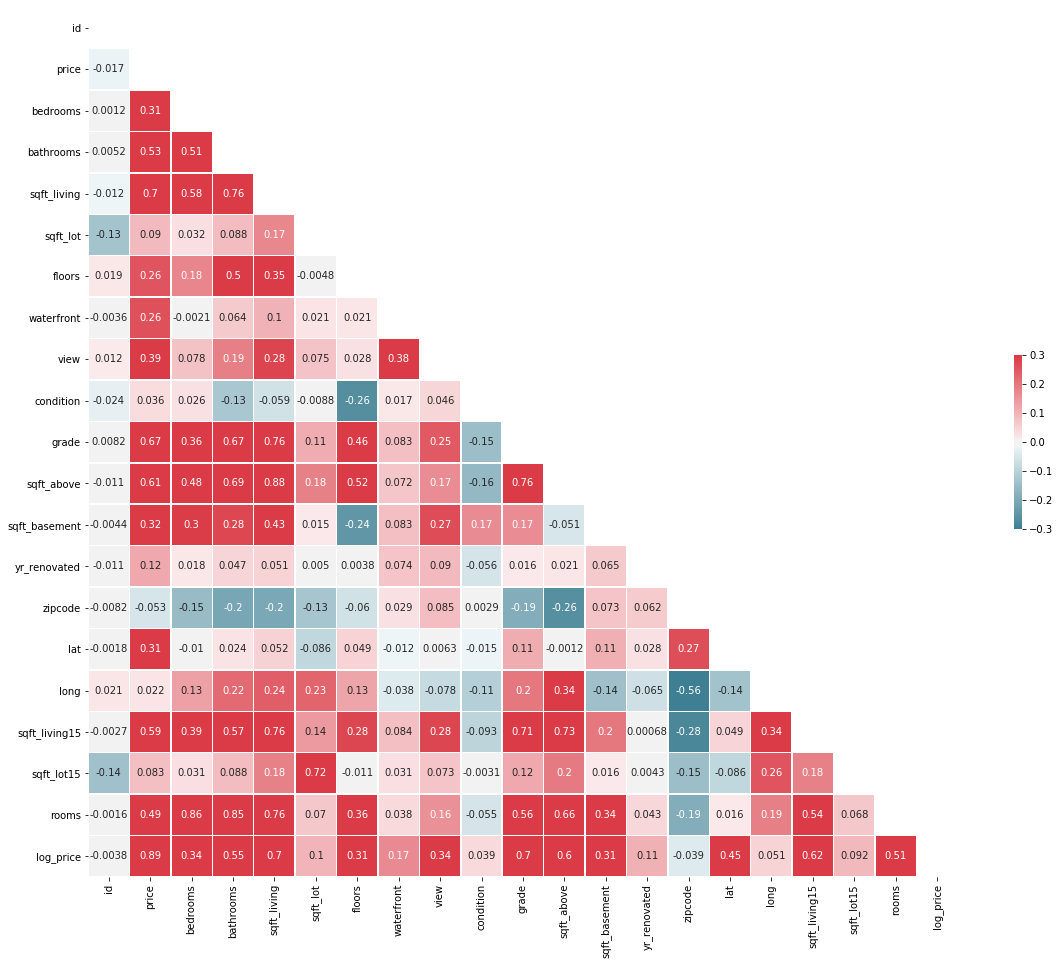

In [385]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 16))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    corr,          # The data to plot
    mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=.3,       # The maximum value of the legend. All higher vals will be same color
    vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .2}  # Extra kwargs for the legend; in this case, shrink by 50%
);

Accorindg to this heatmap price correlates with:
* bedrooms
* bathrooms
* sqft_living
* floors
* waterfront
* view
* grade
* sqft_above
* sqft_basement
* lat

## OLS Analysis


OLS analysis will be used to find a good R-squared for our linear regression model. Also the F-value will be calculated as second indicator for how well each combination of different features is predicting house prices. 

In [419]:
import statsmodels.api as sm
X = df[['sqft_living', 'rooms', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade', 'lat']]
# this includes all features with a correlation coefficient > 0.3

X = sm.add_constant(X)
y = df.price # target value

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     3921.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:16:49   Log-Likelihood:            -2.9553e+05
No. Observations:               21597   AIC:                         5.911e+05
Df Residuals:                   21585   BIC:                         5.912e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.123e+07   5.08e+05    -61.483      0.000   -3.22e+07   -3.02e+07
sqft_living     150.0240     19.010      7.892      0.000     112.764     187.284
rooms          3.991e+04   1647.846     24.221      0.000    3.67e+04    4.31e+04
sqft_above       30.1903     18.972      1.591      0.112      -6.996      67.376
sqft_basement    38.0185     18.874      2.014      0.044       1.023      75.013
bedrooms      -1.478e+05   5398.027    -27.375      0.000   -1.58e+05   -1.37e+05
bathrooms     -1.468e+05   6732.613    -21.808      0.000    -1.6e+05   -1.34e+05
floors        -1.932e+04   3619.790     -5.337      0.000   -2.64e+04   -1.22e+04
waterfront      6.35e+05   1.91e+04     33.267      0.000    5.98e+05    6.72e+05
view           6.594e+04   2175.086     30.315      0.000    6.17e+04    7.02e+04
grade          9.195e+04   2137.764     43.012      0.000    8.78e+04    9.61e+04
lat            6.534e+05   1.07e+04     61.077      0.000    6.32e+05    6.74e+05
==============================================================================
Omnibus:                    16435.848   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1075769.289
Skew:                           3.104   Prob(JB):                         0.00
Kurtosis:                      37.013   Cond. No.                     1.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R squared is below 0.7 and F-value quite low. This model will be now further optimized by adding and dropping various features. 

In [383]:
X2 = df[['sqft_living', 'rooms', 'sqft_above', 'bathrooms', 'floors', 'grade', 'lat']]

X2 = sm.add_constant(X2)
y2 = df.price

model2 = sm.OLS(y2, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     4670.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        06:30:31   Log-Likelihood:            -2.9744e+05
No. Observations:               21597   AIC:                         5.949e+05
Df Residuals:                   21589   BIC:                         5.950e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.138e+07   5.51e+05    -56.915      0.000   -3.25e+07   -3.03e+07
sqft_living   233.8646      4.724     49.508      0.000     224.606     243.124
rooms       -5135.3537    659.118     -7.791      0.000   -6427.274   -3843.433
sqft_above    -31.6323      4.664     -6.783      0.000     -40.773     -22.491
bathrooms    2676.7989   4559.172      0.587      0.557   -6259.515    1.16e+04
floors      -2.823e+04   3934.808     -7.175      0.000   -3.59e+04   -2.05e+04
grade        9.485e+04   2310.612     41.048      0.000    9.03e+04    9.94e+04
lat          6.489e+05   1.16e+04     55.775      0.000    6.26e+05    6.72e+05
==============================================================================
Omnibus:                    19130.862   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1626023.162
Skew:                           3.890   Prob(JB):                         0.00
Kurtosis:                      44.790   Cond. No.                     1.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Prediction Model

The prediction model is based on linear regression and includes following variables:
* sqft_living
* sqft_above
* bathrooms
* floors
* grade
* lat
* rooms
    

In [174]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [259]:
X = df[['sqft_living', 'sqft_above', 'bathrooms', 'floors', 'grade', 'lat', 'rooms']]
y = df['price']


The dataset will be splitted in a test and train section to train and evaluate the final linear regression model.

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [253]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [254]:
print(regressor.intercept_)
print(regressor.coef_)

-57.30776223841227
[ 2.90470164e-04 -6.63721792e-05  1.80535718e-02  9.60032239e-03
  1.59903181e-01  1.44337031e+00 -4.87498905e-03]


In [255]:
y_pred = regressor.predict(X_test)

In [262]:
df_model = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(2)})
df_model.head()

,Actual,Predicted
16729,244500.0,254572.55
10996,190000.0,276789.27
12089,348500.0,426853.51
554,396000.0,446831.75
16075,665000.0,565013.65


In [270]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.21578129931090057
Mean Squared Error: 0.08061090395266893
Root Mean Squared Error: 0.2839205944496963


## Result 


This EDA on house price data in King County showed that time matters when selling and buying properties. House prices and sales to vary during the year and sellers can expect higher prices when selling summer while buyers should opt for the winter time. 

It might be also beneficial for sellers to renovate their house first before offering to potential buyers. Data showed that a house's grading is positively affected by being renovated. 

Although sellers can influence their final house price on that way, this EDA also confirmed that most price influencing features are fixed. Location, number of bathrooms and bedrooms, amount of floors and living area have been set at the time the house has been built and cannot be changed afterwards. 